In [1]:
import os
import numpy as np
from astropy.io import fits

# Define a class to process astronomical images
class ImageProcessor:
    # Initialize the processor with directories for different types of frames
    def __init__(self, transit_frames_dir, bias_frames_dir, flat_frames_dir):
        self.transit_frames_dir = transit_frames_dir
        self.bias_frames_dir = bias_frames_dir
        self.flat_frames_dir = flat_frames_dir

    # Method to calculate the average frame from a directory of frames
    def get_average_frame(self, directory):
        file_list = os.listdir(directory)  # List all files in the directory
        frames = []  # List to store frame data
        # Loop through each file in the file list
        for file in file_list:
            frame_data = fits.getdata(os.path.join(directory, file))  # Read the frame data using astropy.fits
            frames.append(frame_data)  # Append the frame data to the frames list
        average_frame = np.mean(frames, axis=0)  # Calculate the mean of frames along the 0th axis
        return average_frame  # Return the average frame

    # Method to process the images
    def process_images(self):
        bias_frame = self.get_average_frame(self.bias_frames_dir)  # Get the average bias frame
        flat_frame = self.get_average_frame(self.flat_frames_dir)  # Get the average flat frame
        corrected_flat_frame = flat_frame - bias_frame  # Subtract bias from flat to correct it

        transit_file_list = os.listdir(self.transit_frames_dir)  # List all transit frames
        
        # Create a directory for corrected transit frames if it doesn't exist
        corrected_transit_frames_dir = os.path.join(self.transit_frames_dir, 'Corrected_Transit_Frames')
        if not os.path.exists(corrected_transit_frames_dir):
            os.makedirs(corrected_transit_frames_dir)

        # Loop through each transit frame
        for file in transit_file_list:
            transit_frame_data = fits.getdata(os.path.join(self.transit_frames_dir, file))  # Read the transit frame data
            # Correct the transit frame by subtracting bias and dividing by the corrected flat frame
            corrected_transit_frame = (transit_frame_data - bias_frame) / corrected_flat_frame

            # Save the corrected transit frame
            corrected_file_name = 'Corrected_' + file  # Create a name for the corrected file
            corrected_file_path = os.path.join(corrected_transit_frames_dir, corrected_file_name)  # Create a path for the corrected file
            fits.writeto(corrected_file_path, corrected_transit_frame, overwrite=True)  # Write the corrected frame to file

# Create an instance of the ImageProcessor class with directories for transit, bias, and flat frames
processor = ImageProcessor("C:\\ObservingProject\\Transit_Frames", "C:\\ObservingProject\\Bias_Frames", "C:\\ObservingProject\\Flar_Frames")
processor.process_images()  # Call the method to process the images



PermissionError: [Errno 13] Permission denied: 'C:\\ObservingProject\\Transit_Frames\\Corrected_Transit_Frames'

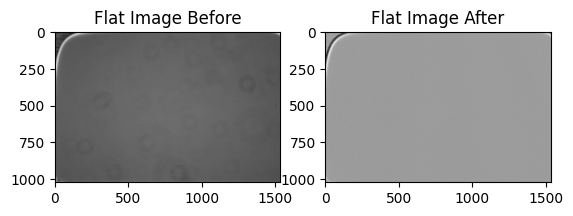

In [2]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Define a class to process astronomical images
class ImageProcessor:
    # Initialize the processor with directories for different types of frames
    def __init__(self, transit_frames_dir, bias_frames_dir, flat_frames_dir):
        self.transit_frames_dir = transit_frames_dir
        self.bias_frames_dir = bias_frames_dir
        self.flat_frames_dir = flat_frames_dir

    # Method to calculate the average frame from a directory of frames
    def get_average_frame(self, directory):
        file_list = os.listdir(directory)  # List all files in the directory
        frames = []  # List to store frame data
        # Loop through each file in the file list
        for file in file_list:
            frame_data = fits.getdata(os.path.join(directory, file))  # Read the frame data using astropy.fits
            frames.append(frame_data)  # Append the frame data to the frames list
        average_frame = np.mean(frames, axis=0)  # Calculate the mean of frames along the 0th axis
        return average_frame  # Return the average frame

    # Method to process the images and display before and after correction
    def process_images(self):
        bias_frame = self.get_average_frame(self.bias_frames_dir)  # Get the average bias frame
        flat_frame = self.get_average_frame(self.flat_frames_dir)  # Get the average flat frame
        corrected_flat_frame = flat_frame - bias_frame  # Subtract bias from flat to correct it

        # Apply the bias and flat transformation to one of the flat images
        flat_file_list = os.listdir(self.flat_frames_dir)  # List all flat frames
        if flat_file_list:  # Check if the list is not empty
            flat_image_data = fits.getdata(os.path.join(self.flat_frames_dir, flat_file_list[0]))  # Read the first flat frame data
            corrected_flat_image = (flat_image_data - bias_frame) / corrected_flat_frame  # Correct the flat image

            # Display the before and after images for the corrected flat image
            fig, (ax1, ax2) = plt.subplots(1, 2)  # Create a subplot with 1 row and 2 columns
            ax1.imshow(flat_image_data, cmap='gray')  # Display the original flat image in grayscale
            ax1.set_title('Flat Image Before')  # Set title for the first subplot
            ax2.imshow(corrected_flat_image, cmap='gray')  # Display the corrected flat image in grayscale
            ax2.set_title('Flat Image After')  # Set title for the second subplot
            plt.show()  # Show the plot

# Create an instance of the ImageProcessor class with directories for transit, bias, and flat frames
processor = ImageProcessor("C:\\ObservingProject\\Transit_Frames", "C:\\ObservingProject\\Bias_Frames", "C:\\ObservingProject\\Flar_Frames")
processor.process_images()  # Call the method to process the images and display the results



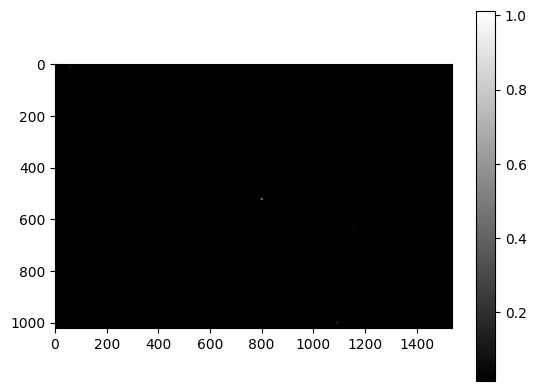

In [3]:
import matplotlib.pyplot as plt
from astropy.io import fits
import os

# Directory where the star images are stored
star_images_dir = "C:\\ObservingProject\\Transit_Frames\\Corrected_Transit_Frames"

# Get the list of all files in the directory
file_list = os.listdir(star_images_dir)

# Check if there are any files in the directory
if file_list:
    # Get the first file from the list
    first_image_file = file_list[0]

    # Construct the full path to the image file
    image_file_path = os.path.join(star_images_dir, first_image_file)

    # Open the FITS file
    image_data = fits.getdata(image_file_path)

    # Display the image
    plt.imshow(image_data, cmap='gray')
    plt.colorbar()
    plt.show()
else:
    print("No files found in the directory.")


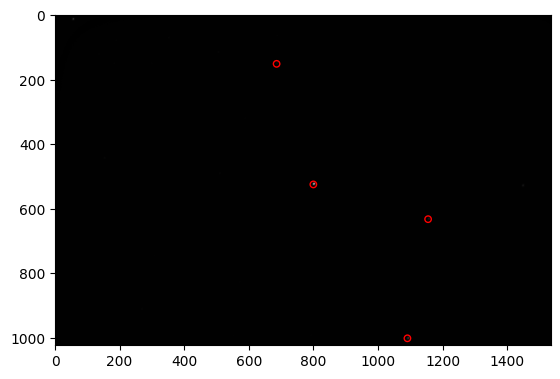

Optimal aperture sizes:  [4, 4, 3, 3]


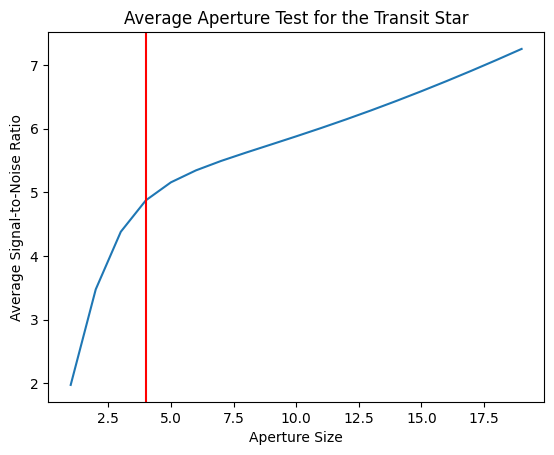

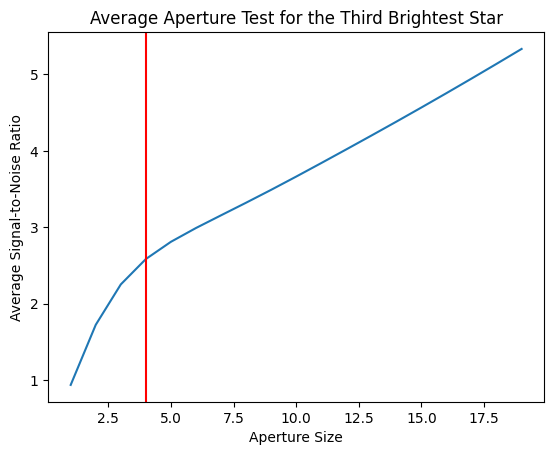

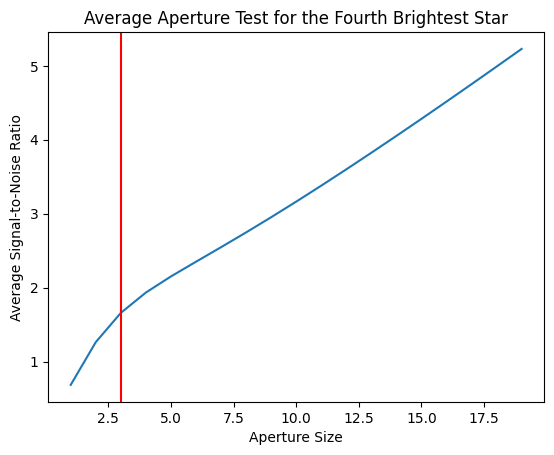

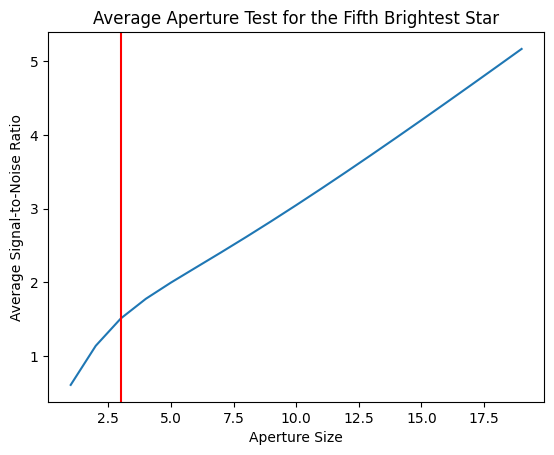

The optimal aperture size is:  [4, 4, 3, 3]


In [4]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture
from photutils.aperture import aperture_photometry
import numpy as np
import matplotlib.patches as patches

# Define a class to perform aperture photometry tests on astronomical images
class ApertureTest:
    def __init__(self):
        pass  # No initialization needed for this class

    # Method to perform the aperture test on a directory of images
    def perform_test(self, directory, aperture_sizes):
        file_list = os.listdir(directory)  # List all files in the directory
        turning_points = []  # List to store results for different aperture sizes

        # Loop through each file in the directory
        for i, file in enumerate(file_list):
            frame_data = fits.getdata(os.path.join(directory, file))  # Read the frame data using astropy.fits
            # Initialize DAOStarFinder with parameters for detecting stars
            daofind = DAOStarFinder(fwhm=3.0, threshold=3.*np.std(frame_data))
            sources = daofind(frame_data)  # Find sources (stars) in the frame data

            # If sources are found and there are more than 3, proceed with photometry
            if sources is not None and len(sources) > 3:
                sorted_sources = sources[np.argsort(sources['flux'])]  # Sort sources by flux
                # Select the brightest and other specific bright sources
                brightest_source = sorted_sources[-1]
                third_brightest_source = sorted_sources[-3]
                fourth_brightest_source = sorted_sources[-4]
                fifth_brightest_source = sorted_sources[-5]
                # Create an array of positions for the selected sources
                positions = np.transpose((brightest_source['xcentroid'], brightest_source['ycentroid']))
                positions = np.vstack((positions, (third_brightest_source['xcentroid'], third_brightest_source['ycentroid'])))
                positions = np.vstack((positions, (fourth_brightest_source['xcentroid'], fourth_brightest_source['ycentroid'])))
                positions = np.vstack((positions, (fifth_brightest_source['xcentroid'], fifth_brightest_source['ycentroid'])))
                
                aperture_sums = []  # List to store sums for each aperture size
                # Loop through each aperture size
                for aperture_size in aperture_sizes:
                    aperture = CircularAperture(positions, r=aperture_size)  # Create a circular aperture
                    phot_table = aperture_photometry(frame_data, aperture)  # Perform photometry
                    aperture_sums.append(phot_table['aperture_sum'])  # Append the sum to the list
                turning_points.append((aperture_sizes, aperture_sums))  # Append results to turning_points


                # Display the first image and circle the stars
                if i == 0:
                    fig, ax = plt.subplots(1)
                    ax.imshow(frame_data, cmap='gray')
                    for pos in positions:
                        circ = patches.Circle(pos, 10, edgecolor='r', facecolor='none')  # adjust the radius as needed
                        ax.add_patch(circ)
                    plt.show()

        # Find the turning point for each image and calculate the average
        avg_signal_to_noise = np.zeros((len(aperture_sizes), 4))
        for i, (aperture_sizes, aperture_sums) in enumerate(turning_points):
            background = np.median(frame_data)  # assuming the background is the median of the frame data
            signal_to_noise = (np.array(aperture_sums) - background) / np.sqrt(np.array(aperture_sums))  # subtract background before calculating SNR
            avg_signal_to_noise += signal_to_noise
        avg_signal_to_noise /= len(turning_points)

        # Calculate the second derivative of the signal-to-noise ratio
        second_derivative = np.gradient(np.gradient(avg_signal_to_noise, axis=0), axis=0)

        # The turning point is the aperture size at which the second derivative is at its negative maximum
        turning_point_index = np.argmin(second_derivative, axis=0)
        turning_point = [aperture_sizes[i] for i in turning_point_index]

        # instead of adding 20%, lets add 1 to the turning point
        new_turning_point = [i + 1 for i in turning_point]

        # Print the optimal aperture sizes
        print("Optimal aperture sizes: ", new_turning_point)

        # Plot the average results for the brightest star
        plt.figure()
        plt.plot(aperture_sizes, avg_signal_to_noise[:, 0])
        plt.axvline(x=new_turning_point[0], color='r')  # plot the new turning point as a line
        plt.title('Average Aperture Test for the Transit Star')
        plt.xlabel('Aperture Size')
        plt.ylabel('Average Signal-to-Noise Ratio')
        plt.show()

        # Plot the average results for the second brightest star
        plt.figure()
        plt.plot(aperture_sizes, avg_signal_to_noise[:, 1])
        plt.axvline(x=new_turning_point[1], color='r')  # plot the new turning point as a line
        plt.title('Average Aperture Test for the Third Brightest Star')
        plt.xlabel('Aperture Size')
        plt.ylabel('Average Signal-to-Noise Ratio')
        plt.show()

        # Plot the average results for the third brightest star
        plt.figure()
        plt.plot(aperture_sizes, avg_signal_to_noise[:, 2])
        plt.axvline(x=new_turning_point[2], color='r')
        plt.title('Average Aperture Test for the Fourth Brightest Star')
        plt.xlabel('Aperture Size')
        plt.ylabel('Average Signal-to-Noise Ratio')
        plt.show()
        
        # Plot the average results for the fourth brightest star
        plt.figure()
        plt.plot(aperture_sizes, avg_signal_to_noise[:, 3])
        plt.axvline(x=new_turning_point[3], color='r')
        plt.title('Average Aperture Test for the Fifth Brightest Star')
        plt.xlabel('Aperture Size')
        plt.ylabel('Average Signal-to-Noise Ratio')
        plt.show()

        # Return the optimal aperture size
        return new_turning_point

if __name__ == "__main__":
    directory = "C:\\ObservingProject\\Transit_Frames\\Corrected_Transit_Frames"
    aperture_sizes = range(1, 20)  # replace with your actual aperture sizes
    test = ApertureTest()
    optimal_aperture_size = test.perform_test(directory, aperture_sizes)
    print("The optimal aperture size is: ", optimal_aperture_size)



 

The estimated radius of the planet is 77831.51957000035 km.


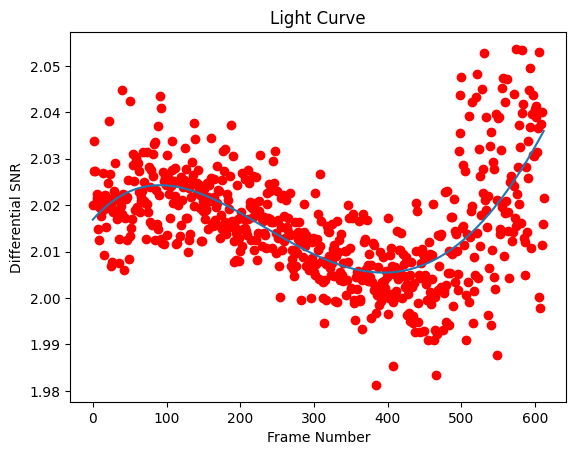

The estimated radius of the planet is 77831.51957000035 km.


In [5]:
import os
import numpy as np
from astropy.io import fits
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture
from photutils.aperture import aperture_photometry
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip

class LightCurveExtractor:
    def __init__(self, transit_frames_dir, aperture_size_target, aperture_size_reference):
        self.transit_frames_dir = transit_frames_dir
        self.aperture_size_target = aperture_size_target
        self.aperture_size_reference = aperture_size_reference

    def extract_light_curve(self):
        file_list = [f for f in os.listdir(self.transit_frames_dir) if f.endswith('.fit')]
        differential_snrs = []

        for file in file_list:
            frame_data = fits.getdata(os.path.join(self.transit_frames_dir, file))
            background = np.median(frame_data)
            frame_data -= background
            daofind = DAOStarFinder(fwhm=3.0, threshold=3.*np.std(frame_data))
            sources = daofind(frame_data)
            if sources is not None and len(sources) > 4:
                sources.sort('flux')
                target_star = sources[-1]
                reference_stars = sources[-3:-1]

                positions_target = (target_star['xcentroid'], target_star['ycentroid'])
                positions_references = [(star['xcentroid'], star['ycentroid']) for star in reference_stars]

                aperture_target = CircularAperture(positions_target, r=self.aperture_size_target)
                apertures_reference = [CircularAperture(pos, r=self.aperture_size_reference) for pos in positions_references]

                phot_table_target = aperture_photometry(frame_data, aperture_target)
                phot_tables_reference = [aperture_photometry(frame_data, aperture) for aperture in apertures_reference]

                flux_target = phot_table_target['aperture_sum'][0]
                fluxes_reference = [table['aperture_sum'][0] for table in phot_tables_reference]

                if flux_target > 0 and all(flux > 0 for flux in fluxes_reference):
                    snr_target = (flux_target - background) / np.sqrt(flux_target + background**2)
                    snr_references = [(flux - background) / np.sqrt(flux + background**2) for flux in fluxes_reference]
                    var_references = [np.var(snr) for snr in snr_references]
                    weights = [1/var if var > 0 else 0 for var in var_references]
                    if np.sum(weights) == 0:
                        mean_reference_snr = np.mean(snr_references)
                    else:
                        mean_reference_snr = np.average(snr_references, weights=weights)
                    
                    differential_snr = snr_target / mean_reference_snr
                    differential_snrs.append(differential_snr)

        differential_snrs = sigma_clip(differential_snrs, sigma=3)
        differential_snrs = differential_snrs[~differential_snrs.mask]
        # fit the light curve with a polynomial
        x = np.arange(len(differential_snrs))
        polynomial = np.polyfit(x, differential_snrs, 4)
        polynomial = np.poly1d(polynomial)
        planet_radius = np.sqrt(1 - polynomial.c[0])
        # use the highest value in the polynomial fit in frames 0-450 as unblocked flux
        unblocked_flux = np.max(polynomial(x[:450]))
        # use the lowest value in the polynomial fit in frames 0-450 as blocked flux
        blocked_flux = np.min(polynomial(x[:450]))
        # define the radius of the star to be 1.16 times the radius of the sun
        star_radius = 1.16 * 695700
        dip_in_snr = unblocked_flux - blocked_flux
        planet_radius = star_radius * np.sqrt(dip_in_snr / unblocked_flux)
        print(f"The estimated radius of the planet is {planet_radius} km.")
        # plot the light curve with the polynomial fit
        plt.plot(x, differential_snrs, 'o', color='red')
        plt.plot(x, polynomial(x))
        plt.xlabel('Frame Number')
        plt.ylabel('Differential SNR')
        plt.title('Light Curve')
        plt.show()

        return planet_radius

if __name__ == "__main__":
    directory = "C:\\ObservingProject\\Transit_Frames\\Corrected_Transit_Frames"
    
    # call the ApertureTest class to get the optimal aperture size for the target and reference stars
    optimal_aperture_size_target = optimal_aperture_size[0]
    optimal_aperture_size_reference = optimal_aperture_size[1]
    
    extractor = LightCurveExtractor(directory, optimal_aperture_size_target, optimal_aperture_size_reference)
    planet_radius = extractor.extract_light_curve()
    print(f"The estimated radius of the planet is {planet_radius} km.")


clearly alot of work is needed. either the differential photometry needs fixed, or I may need better transit data. the next step will be to try and get better transit data to work with, as this will make it significantly easier to comprehend the results.